In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
100% 163M/163M [00:00<00:00, 202MB/s]
100% 163M/163M [00:00<00:00, 184MB/s]


In [5]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

data  face-mask-dataset.zip  sample_data


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1293.jpg', 'with_mask_1952.jpg', 'with_mask_3278.jpg', 'with_mask_303.jpg', 'with_mask_98.jpg']
['with_mask_1663.jpg', 'with_mask_2328.jpg', 'with_mask_2186.jpg', 'with_mask_533.jpg', 'with_mask_2415.jpg']


In [9]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3125.jpg', 'without_mask_3274.jpg', 'without_mask_938.jpg', 'without_mask_3489.jpg', 'without_mask_1308.jpg']
['without_mask_890.jpg', 'without_mask_1103.jpg', 'without_mask_1538.jpg', 'without_mask_1284.jpg', 'without_mask_3030.jpg']


In [10]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [12]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [13]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [14]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [15]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


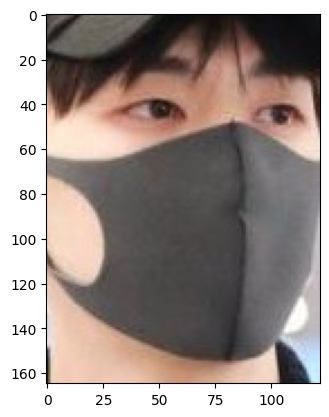

In [16]:
#displaying with mask
img = mpimg.imread('/content/data/with_mask/with_mask_1542.jpg')
imgplot = plt.imshow(img)
plt.show()

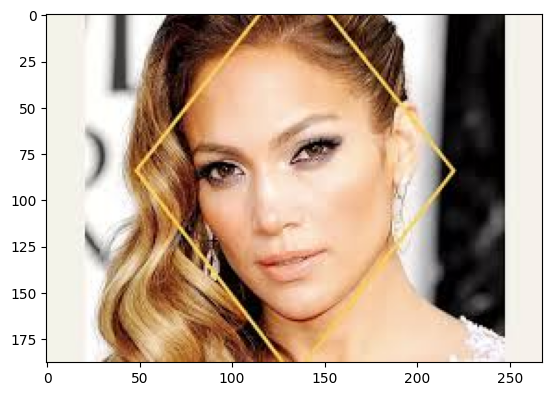

In [17]:
#displaying without mask
img = mpimg.imread('/content/data/without_mask/without_mask_2929.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

In [18]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
type(data)

list

In [20]:
len(data)

7553

array([[[188, 171, 145],
        [188, 171, 145],
        [186, 169, 143],
        ...,
        [192, 176, 151],
        [193, 177, 152],
        [193, 177, 152]],

       [[178, 161, 135],
        [180, 163, 137],
        [183, 166, 140],
        ...,
        [192, 176, 151],
        [193, 177, 152],
        [193, 177, 152]],

       [[172, 155, 129],
        [173, 156, 130],
        [172, 155, 129],
        ...,
        [191, 175, 150],
        [193, 177, 152],
        [193, 177, 152]],

       ...,

       [[ 39,  38,  43],
        [ 31,  34,  36],
        [ 24,  28,  27],
        ...,
        [ 80,  61,  57],
        [ 89,  69,  62],
        [109,  89,  78]],

       [[ 39,  39,  43],
        [ 32,  34,  37],
        [ 25,  29,  29],
        ...,
        [ 78,  60,  56],
        [ 80,  61,  54],
        [ 97,  78,  67]],

       [[ 40,  39,  43],
        [ 32,  34,  36],
        [ 26,  30,  31],
        ...,
        [ 80,  64,  59],
        [ 82,  65,  56],
        [ 88,  70,  58]]], dtype=uint8)
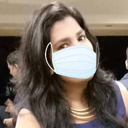

In [21]:
data[0]

In [22]:
type(data[0])

numpy.ndarray

In [23]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


Applying Train Test Split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 84,  47,  28],
        [ 88,  51,  32],
        [100,  63,  44],
        ...,
        [126,  62,  36],
        [126,  62,  35],
        [126,  62,  35]],

       [[ 83,  46,  27],
        [ 87,  50,  31],
        [ 99,  62,  43],
        ...,
        [126,  62,  36],
        [126,  62,  34],
        [125,  61,  34]],

       [[ 80,  42,  23],
        [ 84,  47,  27],
        [ 97,  59,  40],
        ...,
        [127,  63,  37],
        [124,  60,  33],
        [122,  58,  31]],

       ...,

       [[ 15,  19,  22],
        [ 15,  19,  21],
        [ 14,  17,  19],
        ...,
        [ 22,  23,  24],
        [ 21,  22,  24],
        [ 21,  22,  24]],

       [[ 13,  17,  20],
        [ 13,  17,  20],
        [ 14,  16,  19],
        ...,
        [ 19,  20,  21],
        [ 21,  22,  24],
        [ 22,  23,  25]],

       [[ 12,  16,  19],
        [ 12,  16,  19],
        [ 14,  16,  19],
        ...,
        [ 18,  19,  20],
        [ 21,  22,  24],
        [ 23,  24,  26]]], dtype=uint8)
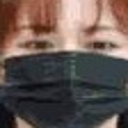

In [25]:
X_train[0]

In [29]:
X_train_scaled[0]

array([[[0.32941176, 0.18431373, 0.10980392],
        [0.34509804, 0.2       , 0.1254902 ],
        [0.39215686, 0.24705882, 0.17254902],
        ...,
        [0.49411765, 0.24313725, 0.14117647],
        [0.49411765, 0.24313725, 0.1372549 ],
        [0.49411765, 0.24313725, 0.1372549 ]],

       [[0.3254902 , 0.18039216, 0.10588235],
        [0.34117647, 0.19607843, 0.12156863],
        [0.38823529, 0.24313725, 0.16862745],
        ...,
        [0.49411765, 0.24313725, 0.14117647],
        [0.49411765, 0.24313725, 0.13333333],
        [0.49019608, 0.23921569, 0.13333333]],

       [[0.31372549, 0.16470588, 0.09019608],
        [0.32941176, 0.18431373, 0.10588235],
        [0.38039216, 0.23137255, 0.15686275],
        ...,
        [0.49803922, 0.24705882, 0.14509804],
        [0.48627451, 0.23529412, 0.12941176],
        [0.47843137, 0.22745098, 0.12156863]],

       ...,

       [[0.05882353, 0.0745098 , 0.08627451],
        [0.05882353, 0.0745098 , 0.08235294],
        [0.05490196, 0

Building a Convolutional Neural Network

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [32]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [33]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 10s 22ms/step - loss: 0.4504 - acc: 0.8006 - val_loss: 0.2360 - val_acc: 0.8959
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2816 - acc: 0.8834 - val_loss: 0.2041 - val_acc: 0.9240
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2381 - acc: 0.8979 - val_loss: 0.2455 - val_acc: 0.8942
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1925 - acc: 0.9229 - val_loss: 0.1736 - val_acc: 0.9339
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1636 - acc: 0.9340 - val_loss: 0.1753 - val_acc: 0.9339


Model Evaluation

In [34]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.2175 - acc: 0.9159
Test Accuracy = 0.9159497022628784


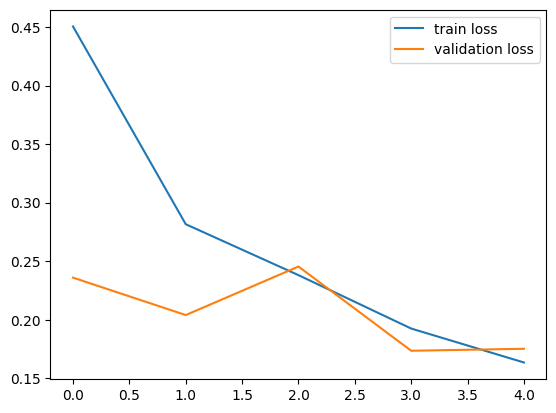

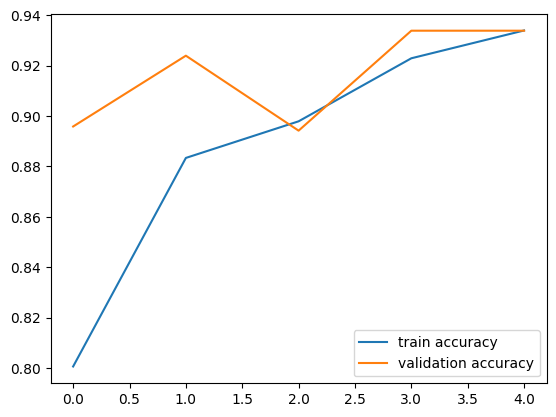

In [35]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System


Path of the image to be predicted: /content/test_image.jpg


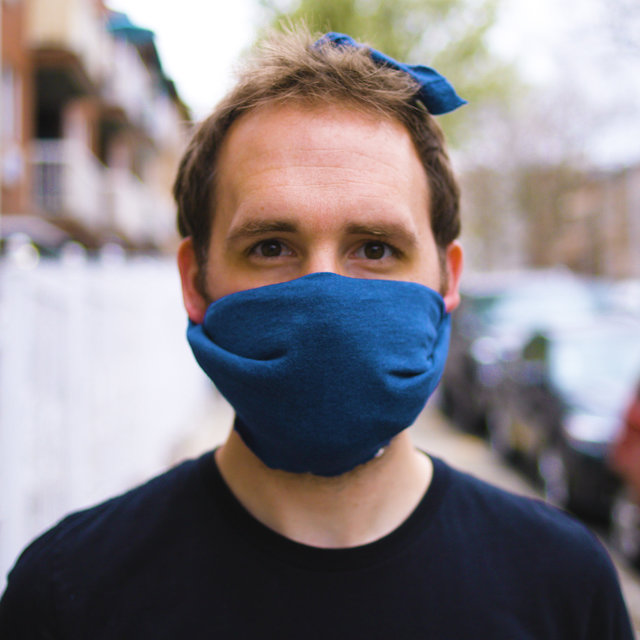

1/1 [==============================] - 0s 375ms/step
[[0.48613593 0.5274989 ]]
1
The person in the image is wearing a mask


In [39]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')